<a href="https://colab.research.google.com/github/KamalAsh0ur/NTI/blob/main/E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import warnings
import dash
import plotly
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc
warnings.filterwarnings("ignore")

<ipython-input-5-69c10e868ab3>:9: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

<ipython-input-5-69c10e868ab3>:10: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



# Data Loading

In [ ]:
sales_target_df = pd.read_csv('/content/Sales target.csv')
order_details_df = pd.read_csv('/content/Order Details.csv')
list_of_orders_df = pd.read_csv('/content/List of Orders.csv')

profile_sales_target = {
    "Shape": sales_target_df.shape,
    "Columns": sales_target_df.columns.tolist(),
    "Nulls": sales_target_df.isnull().sum().to_dict()
}

profile_order_details = {
    "Shape": order_details_df.shape,
    "Columns": order_details_df.columns.tolist(),
    "Nulls": order_details_df.isnull().sum().to_dict()
}

profile_list_of_orders = {
    "Shape": list_of_orders_df.shape,
    "Columns": list_of_orders_df.columns.tolist(),
    "Nulls": list_of_orders_df.isnull().sum().to_dict()
}

profile_sales_target, profile_order_details, profile_list_of_orders

({'Shape': (36, 3),
  'Columns': ['Month of Order Date', 'Category', 'Target'],
  'Nulls': {'Month of Order Date': 0, 'Category': 0, 'Target': 0}},
 {'Shape': (1500, 6),
  'Columns': ['Order ID',
   'Amount',
   'Profit',
   'Quantity',
   'Category',
   'Sub-Category'],
  'Nulls': {'Order ID': 0,
   'Amount': 0,
   'Profit': 0,
   'Quantity': 0,
   'Category': 0,
   'Sub-Category': 0}},
 {'Shape': (560, 5),
  'Columns': ['Order ID', 'Order Date', 'CustomerName', 'State', 'City'],
  'Nulls': {'Order ID': 60,
   'Order Date': 60,
   'CustomerName': 60,
   'State': 60,
   'City': 60}})

In [ ]:
sales_target_df

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0
5,Sep-18,Furniture,11000.0
6,Oct-18,Furniture,11100.0
7,Nov-18,Furniture,11300.0
8,Dec-18,Furniture,11400.0
9,Jan-19,Furniture,11500.0


In [ ]:
order_details_df

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones
...,...,...,...,...,...,...
1495,B-26099,835.0,267.0,5,Electronics,Phones
1496,B-26099,2366.0,552.0,5,Clothing,Trousers
1497,B-26100,828.0,230.0,2,Furniture,Chairs
1498,B-26100,34.0,10.0,2,Clothing,T-shirt


In [ ]:
list_of_orders_df

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata
...,...,...,...,...,...
555,NaN,NaN,NaN,NaN,NaN
556,NaN,NaN,NaN,NaN,NaN
557,NaN,NaN,NaN,NaN,NaN
558,NaN,NaN,NaN,NaN,NaN


In [ ]:
list_of_orders_df.dropna(inplace=True)

<Figure size 1000x600 with 0 Axes>

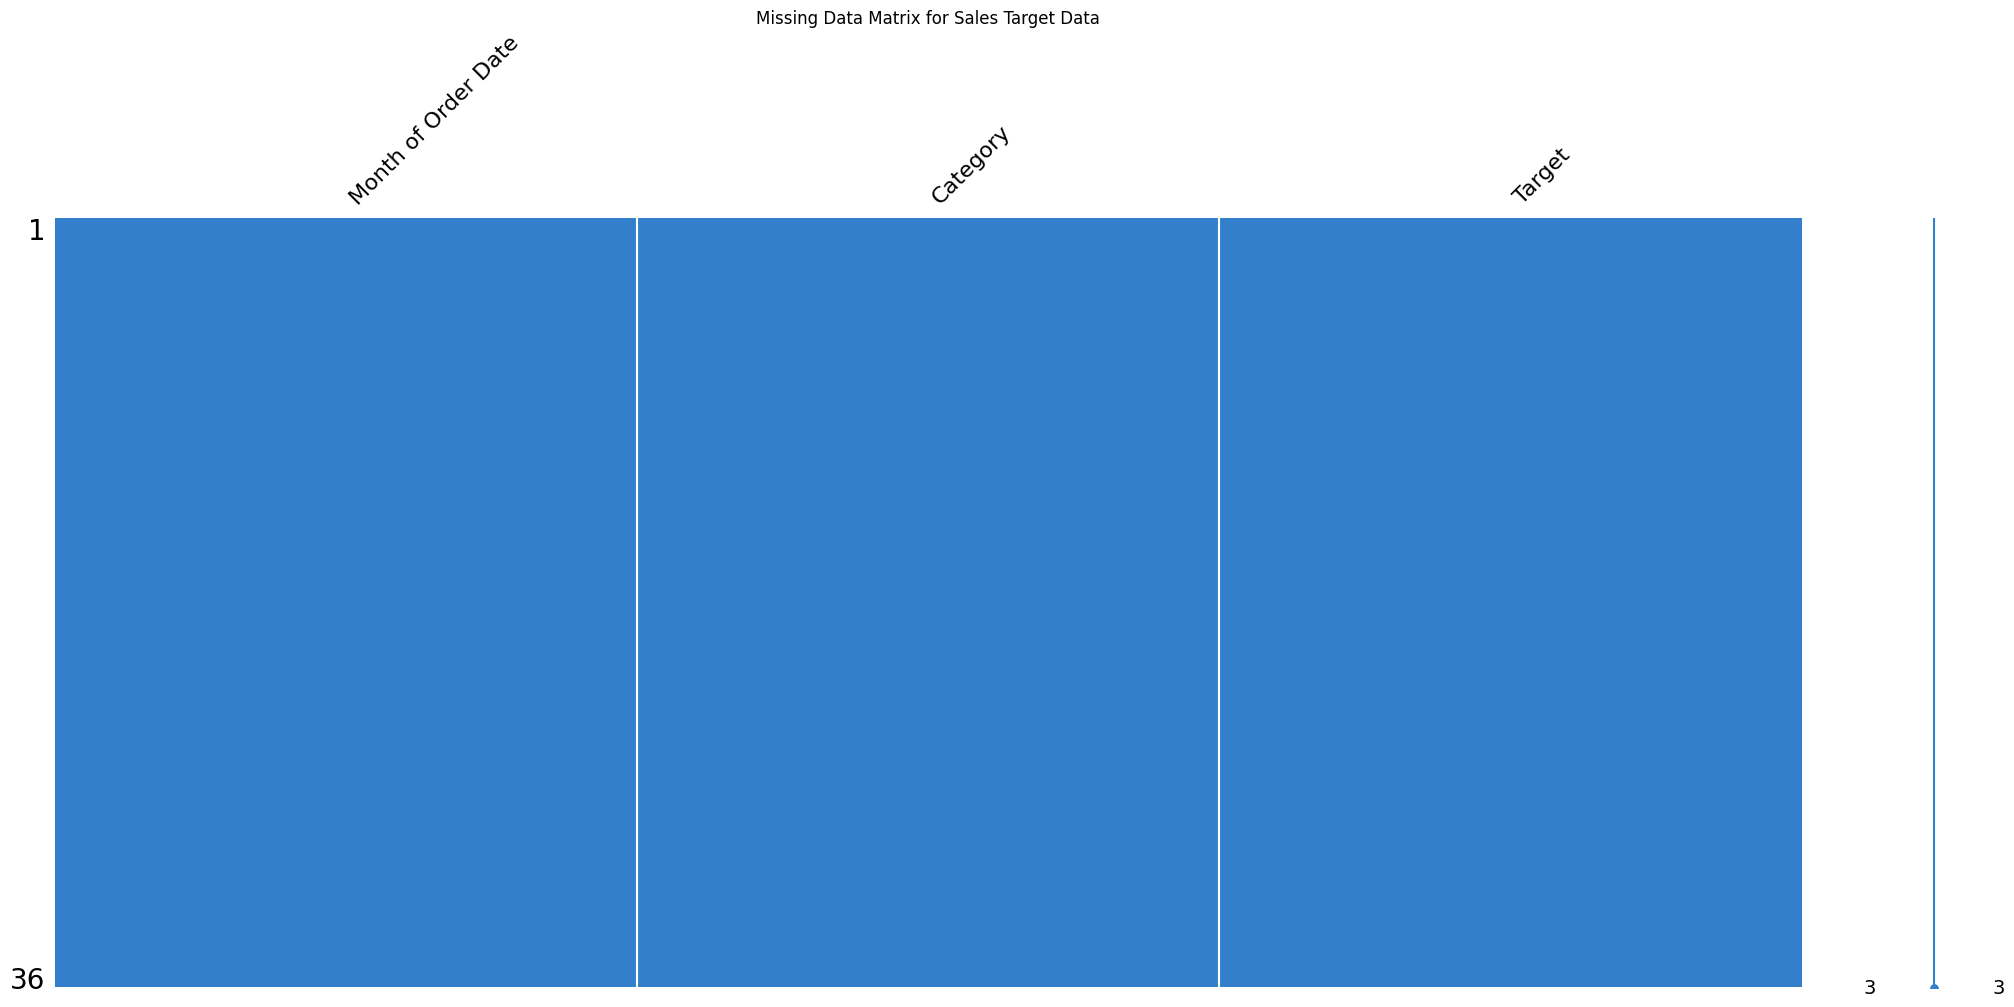

<Figure size 1000x600 with 0 Axes>

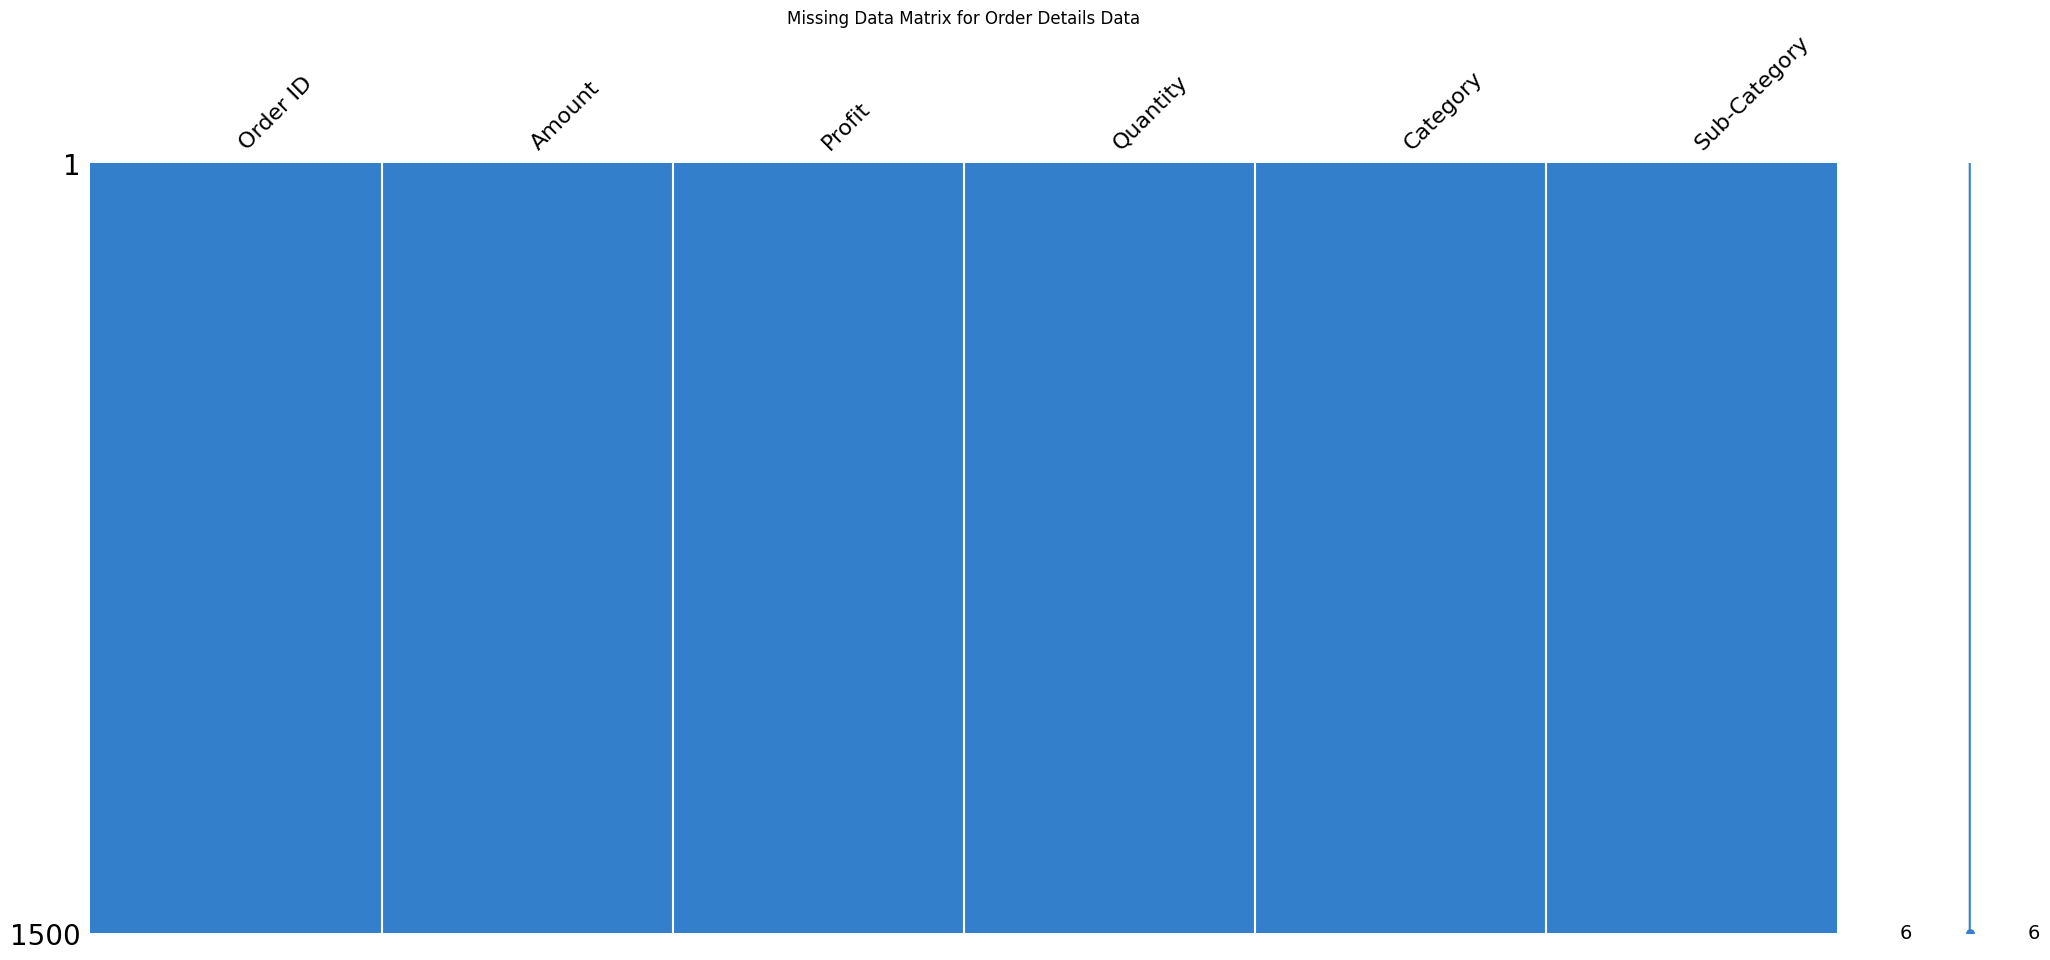

<Figure size 1000x600 with 0 Axes>

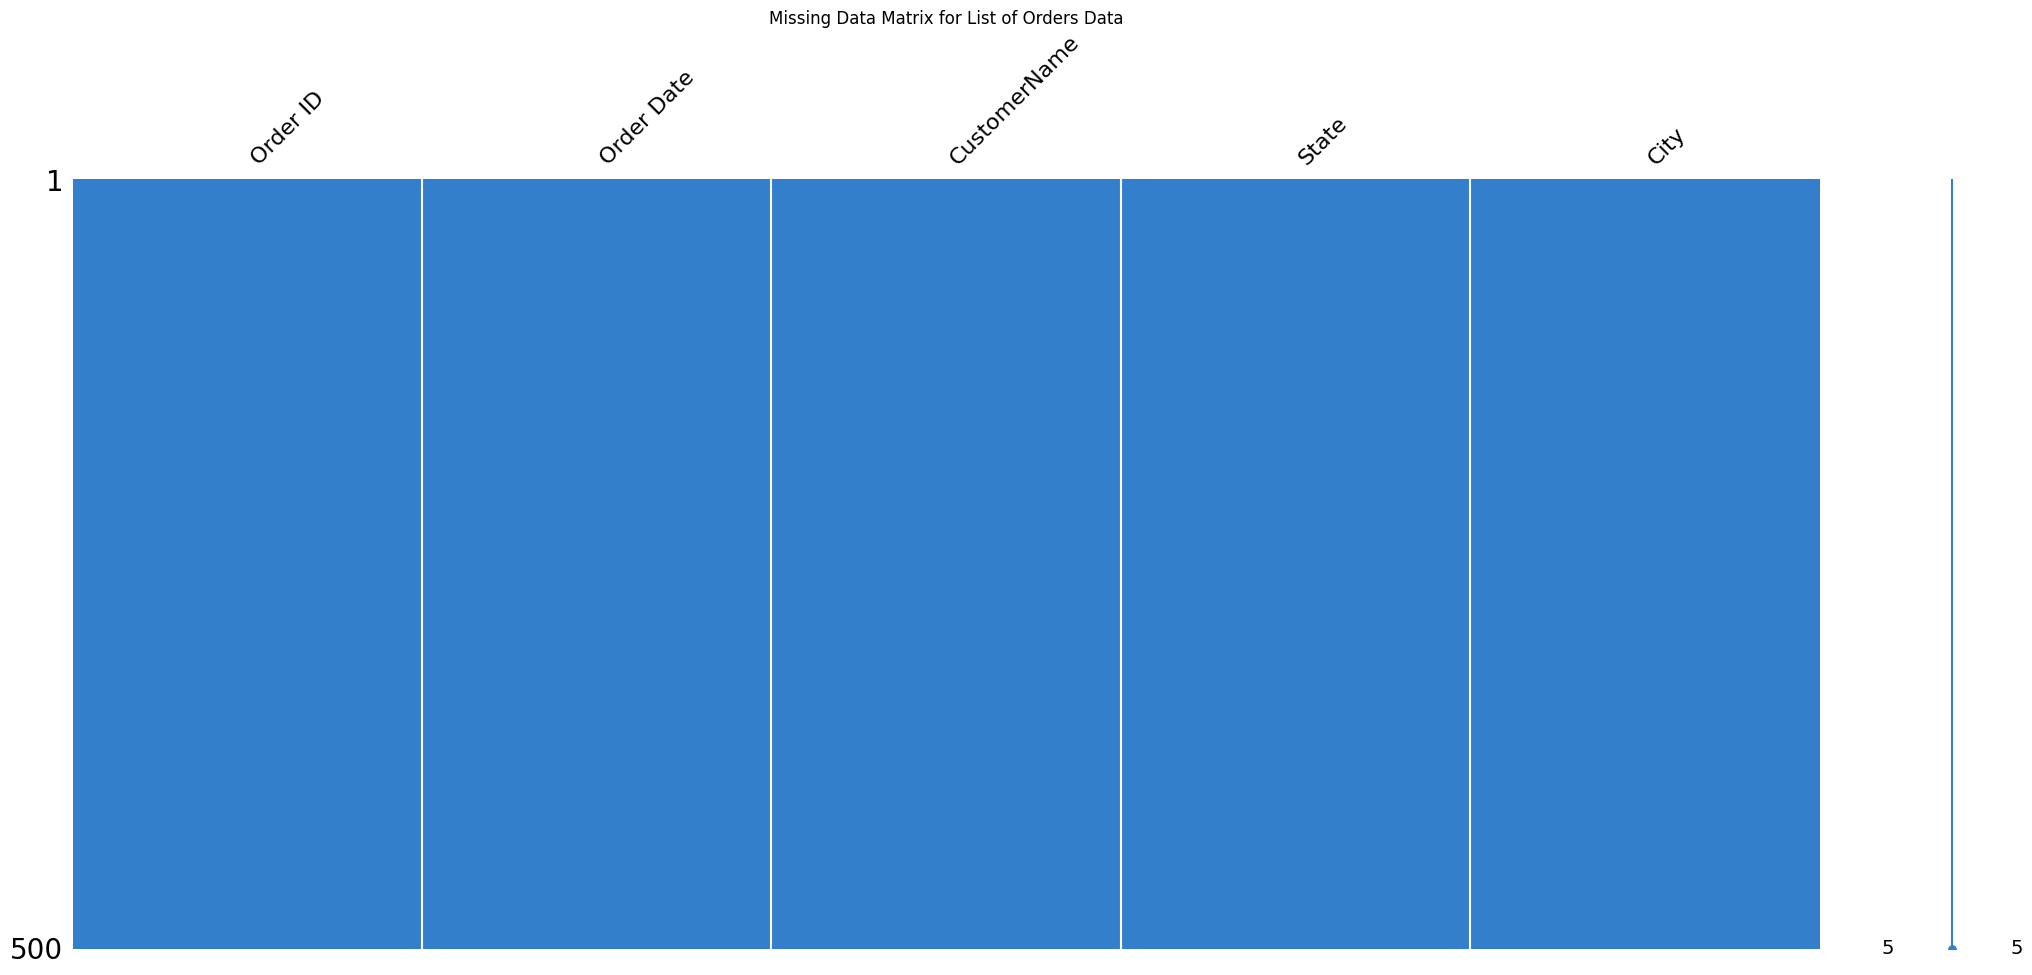

In [ ]:
import missingno as msno

# Function to plot missingno matrix
def plot_missingno_matrix(df, title):
    plt.figure(figsize=(10, 6))
    msno.matrix(df, color=(0.2, 0.5, 0.8))
    plt.title(f'Missing Data Matrix for {title}')
    plt.show()

# Generate missingno matrix plots for each DataFrame
plot_missingno_matrix(sales_target_df, 'Sales Target Data')
plot_missingno_matrix(order_details_df, 'Order Details Data')
plot_missingno_matrix(list_of_orders_df, 'List of Orders Data')

# Profiling

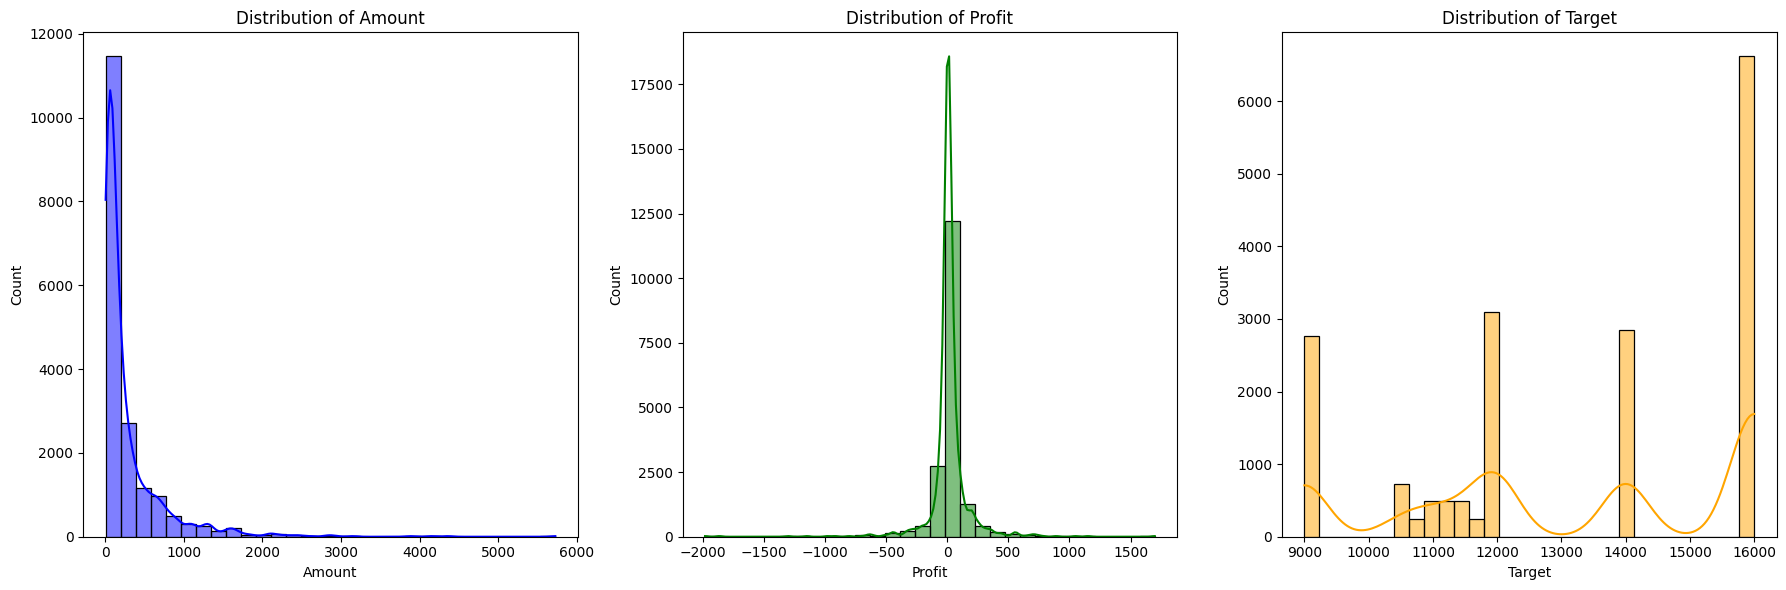

In [ ]:

merged_df = pd.merge(order_details_df, list_of_orders_df, on="Order ID", how="outer")
merged_df = pd.merge(merged_df, sales_target_df, left_on="Category", right_on="Category", how="left")

merged_df.fillna({"Amount": 0, "Profit": 0, "Quantity": 0, "Target": 0}, inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(merged_df["Amount"], kde=True, bins=30, ax=axes[0], color='blue')
axes[0].set_title("Distribution of Amount")
axes[0].set_xlabel("Amount")

sns.histplot(merged_df["Profit"], kde=True, bins=30, ax=axes[1], color='green')
axes[1].set_title("Distribution of Profit")
axes[1].set_xlabel("Profit")

sns.histplot(merged_df["Target"], kde=True, bins=30, ax=axes[2], color='orange')
axes[2].set_title("Distribution of Target")
axes[2].set_xlabel("Target")

plt.tight_layout()
plt.show()


In [ ]:
df = pd.merge(order_details_df, list_of_orders_df, on="Order ID", how="outer")
df = pd.merge(merged_df, sales_target_df, left_on="Category", right_on="Category", how="left")

df.fillna({"Amount": 0, "Profit": 0, "Quantity": 0, "Target": 0}, inplace=True)

print(df.head())

  Order ID  Amount  Profit  Quantity   Category Sub-Category  Order Date  \
0  B-25601  1275.0 -1148.0         7  Furniture    Bookcases  01-04-2018   
1  B-25601  1275.0 -1148.0         7  Furniture    Bookcases  01-04-2018   
2  B-25601  1275.0 -1148.0         7  Furniture    Bookcases  01-04-2018   
3  B-25601  1275.0 -1148.0         7  Furniture    Bookcases  01-04-2018   
4  B-25601  1275.0 -1148.0         7  Furniture    Bookcases  01-04-2018   

  CustomerName    State       City Month of Order Date_x  Target_x  \
0       Bharat  Gujarat  Ahmedabad                Apr-18   10400.0   
1       Bharat  Gujarat  Ahmedabad                Apr-18   10400.0   
2       Bharat  Gujarat  Ahmedabad                Apr-18   10400.0   
3       Bharat  Gujarat  Ahmedabad                Apr-18   10400.0   
4       Bharat  Gujarat  Ahmedabad                Apr-18   10400.0   

  Month of Order Date_y  Target_y  
0                Apr-18   10400.0  
1                May-18   10500.0  
2             

In [ ]:
df

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City,Month of Order Date_x,Target_x,Month of Order Date_y,Target_y
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad,Apr-18,10400.0,Apr-18,10400.0
1,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad,Apr-18,10400.0,May-18,10500.0
2,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad,Apr-18,10400.0,Jun-18,10600.0
3,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad,Apr-18,10400.0,Jul-18,10800.0
4,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad,Apr-18,10400.0,Aug-18,10900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215995,B-26100,72.0,16.0,2,Clothing,Shirt,31-03-2019,Hitika,Madhya Pradesh,Indore,Mar-19,16000.0,Nov-18,16000.0
215996,B-26100,72.0,16.0,2,Clothing,Shirt,31-03-2019,Hitika,Madhya Pradesh,Indore,Mar-19,16000.0,Dec-18,16000.0
215997,B-26100,72.0,16.0,2,Clothing,Shirt,31-03-2019,Hitika,Madhya Pradesh,Indore,Mar-19,16000.0,Jan-19,16000.0
215998,B-26100,72.0,16.0,2,Clothing,Shirt,31-03-2019,Hitika,Madhya Pradesh,Indore,Mar-19,16000.0,Feb-19,16000.0


In [ ]:
df.dropna(inplace=True)

In [ ]:
numerical_features = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_features].corr()
print(correlation_matrix)

            Amount    Profit  Quantity  Target_x  Target_y
Amount    1.000000  0.242045  0.352052 -0.270494 -0.270494
Profit    0.242045  1.000000  0.002441 -0.023608 -0.023608
Quantity  0.352052  0.002441  1.000000 -0.014762 -0.014762
Target_x -0.270494 -0.023608 -0.014762  1.000000  0.453342
Target_y -0.270494 -0.023608 -0.014762  0.453342  1.000000


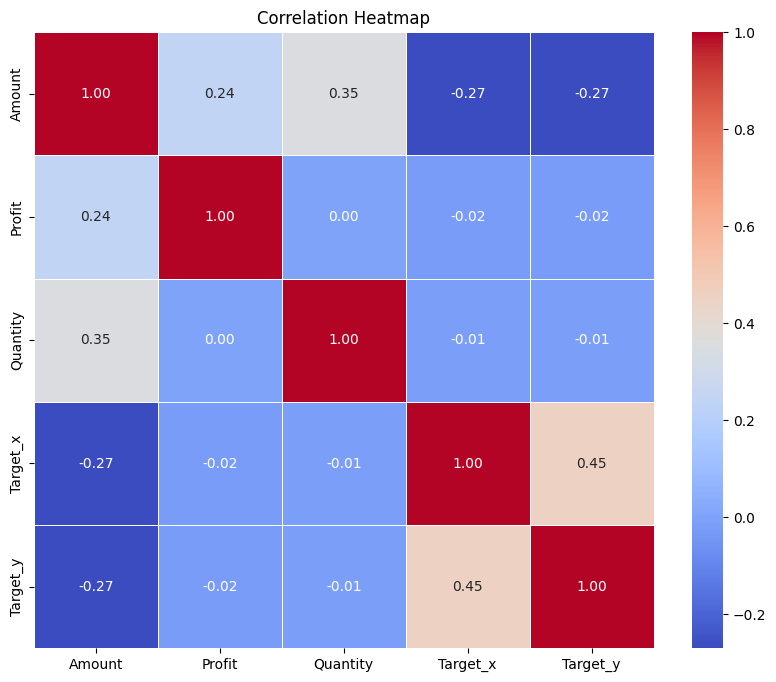

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

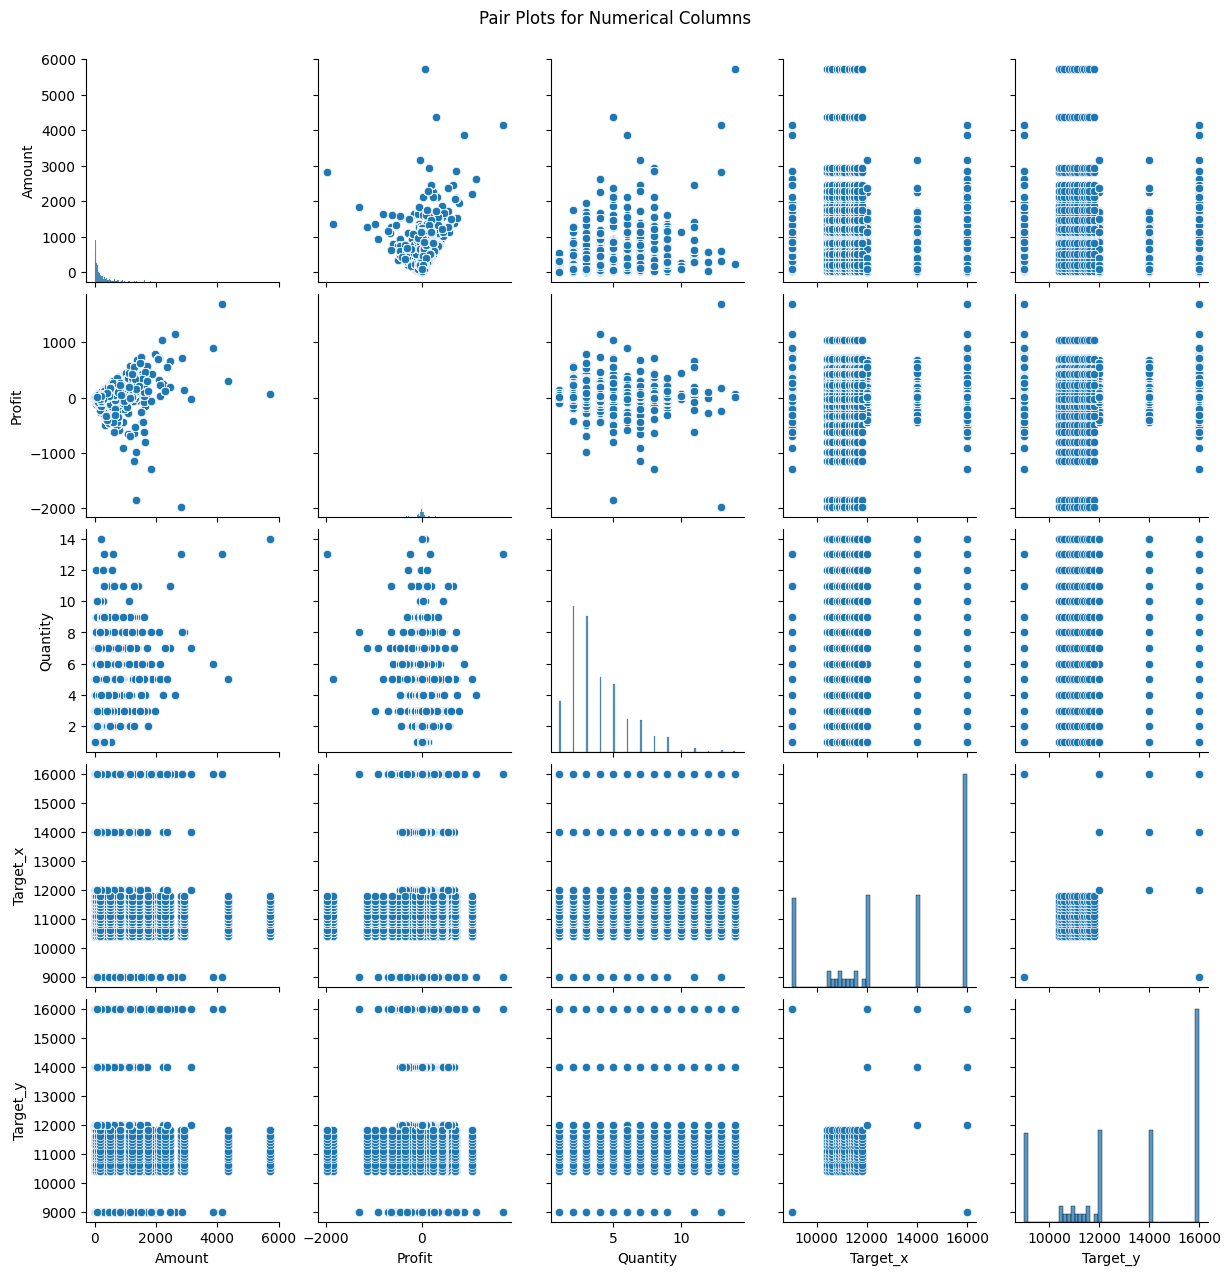

In [ ]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pair Plots for Numerical Columns', y=1.02)
plt.show()

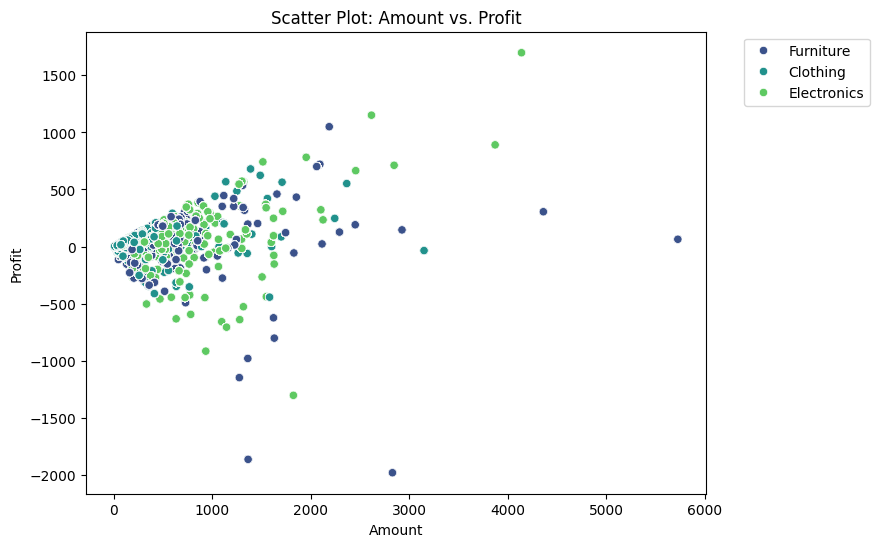

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Amount', y='Profit', data=df, hue='Category', palette='viridis')
plt.title('Scatter Plot: Amount vs. Profit')
plt.xlabel('Amount')
plt.ylabel('Profit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

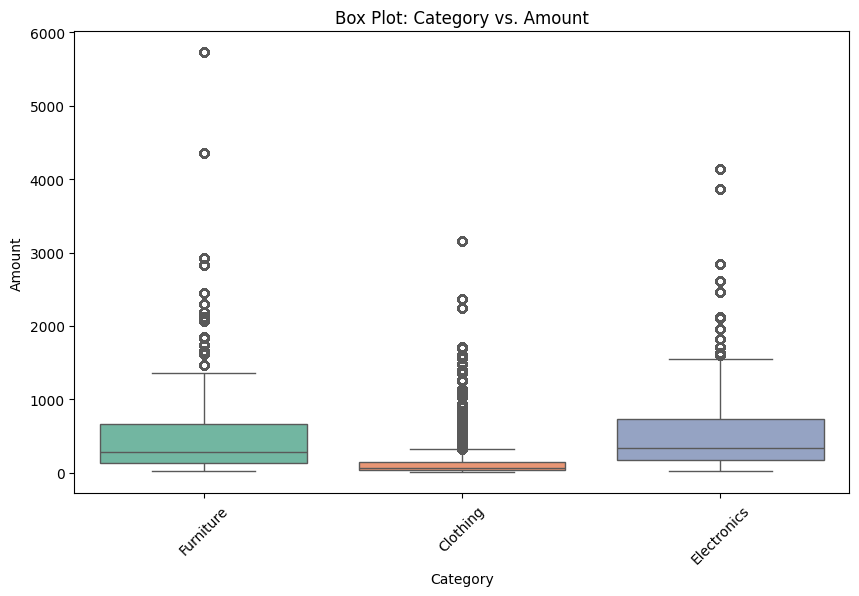

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Amount', data=df, palette='Set2')
plt.title('Box Plot: Category vs. Amount')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

df_sampled = df.iloc[::10, :]

fig = px.scatter_3d(df_sampled, x='Amount', y='Profit', z='Quantity', color='Category',
                    size='Target_x',  # Ensure this column exists
                    hover_data=['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Target_x'],
                    title='Interactive 3D Scatter Plot: Amount vs. Profit vs. Quantity',
                    labels={'Amount': 'Amount ($)', 'Profit': 'Profit ($)', 'Quantity': 'Quantity', 'Target_x': 'Target ($)'},
                    color_discrete_sequence=px.colors.qualitative.Plotly)  # Use a distinct color palette

max_profit_row = df_sampled.loc[df_sampled['Profit'].idxmax()]

fig.add_trace(
    go.Scatter3d(
        x=[max_profit_row['Amount']],
        y=[max_profit_row['Profit']],
        z=[max_profit_row['Quantity']],
        mode='markers',
        marker=dict(
            size=10,  # Larger size for emphasis
            color='red',  # Distinct color
            symbol='diamond'  # Distinct symbol
        ),
        name='Max Profit'
    )
)

fig.update_layout(
    scene=dict(
        xaxis_title='Amount ($)',
        yaxis_title='Profit ($)',
        zaxis_title='Quantity',
        xaxis=dict(backgroundcolor='rgba(0,0,0,0)', gridcolor='lightgray'),
        yaxis=dict(backgroundcolor='rgba(0,0,0,0)', gridcolor='lightgray'),
        zaxis=dict(backgroundcolor='rgba(0,0,0,0)', gridcolor='lightgray')
    ),
    margin=dict(l=0, r=0, b=0, t=40),
    legend=dict(title='Category', x=1, y=1),
    hoverlabel=dict(bgcolor='white', font_size=12)
)

# Add annotations (optional)
annotations = [
    dict(
        x=max_profit_row['Amount'],
        y=max_profit_row['Profit'],
        z=max_profit_row['Quantity'],
        text='Max Profit',
        showarrow=True,
        arrowhead=1,
        ax=0, ay=-40
    )
]
fig.update_layout(scene_annotations=annotations)

buttons = [
    dict(
        label='All',
        method='update',
        args=[{'visible': [True] * len(df_sampled['Category'].unique())}]
    )
]
for category in df_sampled['Category'].unique():
    buttons.append(
        dict(
            label=category,
            method='update',
            args=[{'visible': df_sampled['Category'] == category}]
        )
    )

fig.update_layout(
    updatemenus=[
        dict(
            type='dropdown',
            showactive=True,
            buttons=buttons,
            x=0.1,
            y=1.1
        )
    ]
)

fig.show()

In [ ]:

def handle_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    df_filtered = df[(z_scores < threshold)]
    return df_filtered

df = handle_outliers_zscore(df, 'Quantity')


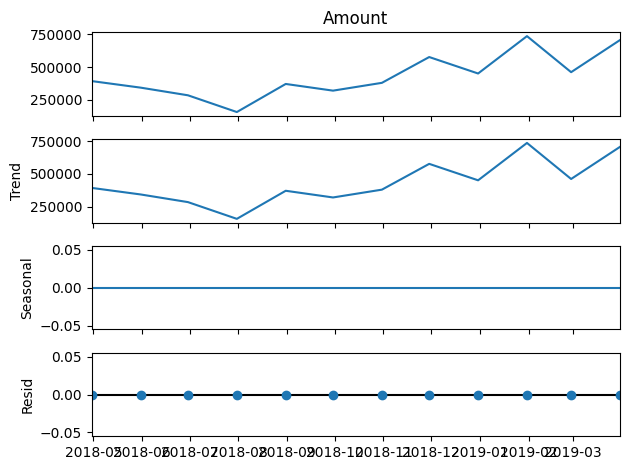

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Ensure matplotlib inline plotting in notebook environments
%matplotlib inline

# Verify the DataFrame exists and contains required columns
# df = ... # Assuming df is already loaded with the correct structure

# 1. Time Series Analysis (Monthly Trends)
# Convert 'Order Date' to datetime once, ensure it's correctly loaded
if 'Order Date' in df.columns and pd.api.types.is_object_dtype(df['Order Date']):
    df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

# Set 'Order Date' as the DataFrame index for resampling
if 'Order Date' in df.columns:
    df.set_index('Order Date', inplace=True)

# Check for required columns before resampling
if 'Amount' in df.columns and 'Profit' in df.columns:
    # Resample to get monthly sales and profit
    monthly_sales = df['Amount'].resample('M').sum()
    monthly_profit = df['Profit'].resample('M').sum()

    # Interactive time series plot
    fig = px.line(
        x=monthly_sales.index,
        y=monthly_sales.values,
        labels={'x': 'Date', 'y': 'Sales'},
        title='Monthly Sales and Profit Trend'
    )
    fig.add_scatter(
        x=monthly_profit.index,
        y=monthly_profit.values,
        name='Profit'
    )
    fig.show()

    # Time series decomposition
    # Assuming monthly data with yearly seasonality
    period = monthly_sales.index.freq.n if monthly_sales.index.freq else 12

    # Check if enough data for decomposition
    min_observations = 2 * period
    if len(monthly_sales) >= min_observations:
        decomposition = seasonal_decompose(
            monthly_sales.fillna(0),
            model='additive',
            period=period
        )
        decomposition.plot()
        plt.show()
    else:
        print(
            "Insufficient data for seasonal decomposition. "
            f"Need at least {min_observations} observations, "
            f"but only have {len(monthly_sales)}."
        )

# 2. Customer RFM Analysis
# Ensure 'Customer ID', 'Order ID' exist before proceeding
if 'Customer ID' in df.columns and 'Order ID' in df.columns:
    # Reset index for grouped operations if necessary
    df.reset_index(inplace=True)

    # Calculate Recency, Frequency, and Monetary values
    latest_date = df['Order Date'].max()
    rfm = df.groupby('Customer ID').agg({
        'Order Date': lambda x: (latest_date - x.max()).days,
        'Order ID': 'nunique',
        'Amount': 'sum'
    }).rename(columns={
        'Order Date': 'Recency',
        'Order ID': 'Frequency',
        'Amount': 'Monetary'
    })

    # Handle potential infinite or missing values
    rfm.replace([np.inf, -np.inf], np.nan, inplace=True)
    rfm.dropna(inplace=True)

    # Optional: Log transformation to reduce skewness
    rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log1p)

    # RFM Segmentation using K-Means
    kmeans = KMeans(n_clusters=4, random_state=42)
    rfm['Cluster'] = kmeans.fit_predict(rfm_log)

    # 3D Interactive RFM Visualization
    fig = px.scatter_3d(
        rfm,
        x='Recency',
        y='Frequency',
        z='Monetary',
        color='Cluster',
        hover_name=rfm.index.astype(str),
        title='Customer RFM Segmentation'
    )
    fig.show()

# 3. Advanced Product Analysis
# Ensure 'Category', 'Sub-Category' exist before plotting
if 'Category' in df.columns and 'Sub-Category' in df.columns:
    subcat_sales = df.groupby(['Category', 'Sub-Category'])['Amount'].sum().reset_index()
    fig = px.treemap(
        subcat_sales,
        path=['Category', 'Sub-Category'],
        values='Amount',
        title='Sales Distribution by Category Hierarchy'
    )
    fig.show()

# 4. Regional Performance Analysis
if 'Region' in df.columns:
    regional_profit = df.groupby('Region')['Profit'].sum().reset_index()
    fig = px.choropleth(
        regional_profit,
        locations='Region',
        locationmode='USA-states',
        color='Profit',
        scope='usa',
        title='Regional Profit Distribution'
    )
    fig.show()

# 5. Profitability Analysis
if 'Amount' in df.columns and 'Profit' in df.columns and 'Category' in df.columns:
    fig = px.scatter(
        df,
        x='Amount',
        y='Profit',
        color='Category',
        marginal_x='box',
        marginal_y='violin',
        title='Profit vs Sales Amount Relationship'
    )
    fig.show()

# 6. ARIMA Forecasting
if len(monthly_sales) > 0:
    # Check for stationarity and perform differencing if necessary
    adf_result = adfuller(monthly_sales)
    if adf_result[1] > 0.05:
        monthly_sales_diff = monthly_sales.diff().dropna()
    else:
        monthly_sales_diff = monthly_sales

    # Fit ARIMA model
    model = ARIMA(monthly_sales_diff, order=(1, 1, 1))
    results = model.fit()

In [57]:


# 7. Advanced Correlation Analysis
numeric_cols = df.select_dtypes(include=['number']).columns
corr_matrix = df[numeric_cols].corr()

fig = px.imshow(
    corr_matrix,
    text_auto=True,
    aspect='auto',
    title='Feature Correlation Matrix'
)
fig.show()

# 8. Predictive Analytics Sample (ARIMA Forecasting)
# Ensure index is a DateTimeIndex with no gaps
monthly_sales = monthly_sales.asfreq('M').fillna(0)

# Check for stationarity and perform differencing if necessary
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(monthly_sales)
if adf_result[1] > 0.05:
    monthly_sales_diff = monthly_sales.diff().dropna()
else:
    monthly_sales_diff = monthly_sales

# Fit ARIMA model
model = ARIMA(monthly_sales_diff, order=(1, 1, 1))
results = model.fit()


In [58]:
import plotly.graph_objects as go

# Forecast
forecast = results.get_forecast(steps=6)
forecast_index = pd.date_range(
    start=monthly_sales.index[-1] + pd.offsets.MonthBegin(),
    periods=6,
    freq='M'
)

# Prepare data for plotting
historical_dates = monthly_sales.index
historical_values = monthly_sales.values
forecast_dates = forecast_index
forecast_values = forecast.predicted_mean.cumsum() + monthly_sales.values[-1]
conf_int_lower = forecast.conf_int().iloc[:, 0].cumsum() + monthly_sales.values[-1]
conf_int_upper = forecast.conf_int().iloc[:, 1].cumsum() + monthly_sales.values[-1]

# Create interactive plot
fig = go.Figure()

# Add historical data
fig.add_trace(go.Scatter(
    x=historical_dates,
    y=historical_values,
    mode='lines',
    name='Historical Sales',
    line=dict(color='blue')
))

# Add forecast data
fig.add_trace(go.Scatter(
    x=forecast_dates,
    y=forecast_values,
    mode='lines',
    name='Forecast',
    line=dict(dash='dash', color='red')
))

# Add confidence interval
fig.add_trace(go.Scatter(
    x=forecast_dates.tolist() + forecast_dates[::-1].tolist(),
    y=conf_int_upper.tolist() + conf_int_lower[::-1].tolist(),
    fill='toself',
    fillcolor='rgba(255, 0, 0, 0.1)',
    line=dict(color='rgba(255, 0, 0, 0)'),
    hoverinfo="skip",
    showlegend=False
))

# Update layout
fig.update_layout(
    title='6-Month Sales Forecast',
    xaxis_title='Date',
    yaxis_title='Sales Amount',
    legend=dict(x=0, y=1),
    hovermode='x unified'
)

# Show plot
fig.show()